In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 표준편차 5

62.010955856603566
98.06159256098556


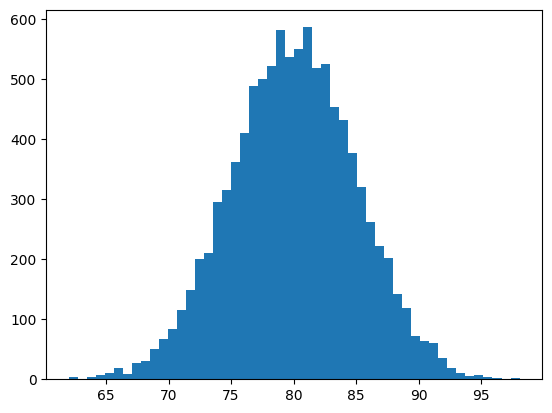

In [11]:
mean = 80
std = 5

# seed 설정해서 값 고정 
np.random.seed(5)

data_std_5 = np.random.normal(mean, std, 10000)

print(min(data_std_5));print(max(data_std_5))

plt.hist(data_std_5, bins=50)
plt.show()

<Axes: >

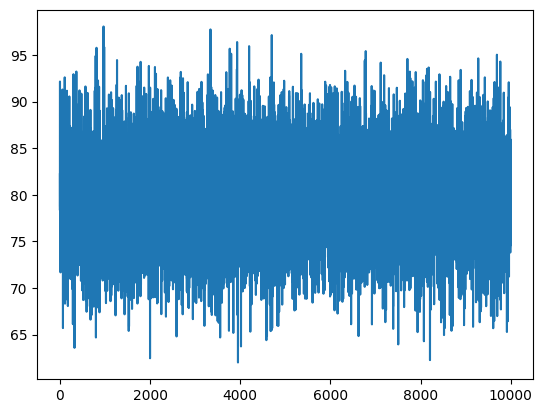

In [12]:
pd.Series(data_std_5).plot()

In [13]:
print((data_std_5>100).sum())
print((data_std_5<60).sum())

0
0


[ 82.20613743  78.34564924  92.15385594 ...  81.48861194  80.30561392
 149.        ]


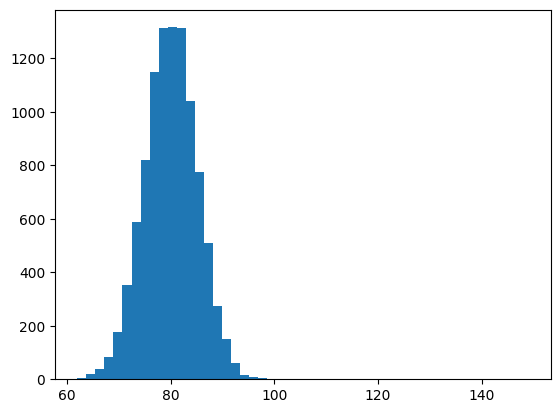

149.0
62.010955856603566


In [14]:
#### 3% noise

# 데이터 생성
np.random.seed(5)

data_std_5 = np.random.normal(mean, std, 10000)

outlier_size = int(0.03 * len(data_std_5))

lower_bound = 0 # 최솟값
upper_bound = 200 #최대값

range = upper_bound - lower_bound

np.random.seed(38)

outliers = np.random.randint(lower_bound, upper_bound, size=outlier_size)

for outlier in outliers:
    data_3 = np.concatenate((data_std_5, np.array([outlier + np.random.randint(-30, 30)])))

print(data_3)

plt.hist(data_3, bins=50)
plt.show()

print(max(data_3));print(min(data_3))

[ 82.20613743  78.34564924  92.15385594 ...  81.48861194  80.30561392
 139.        ]


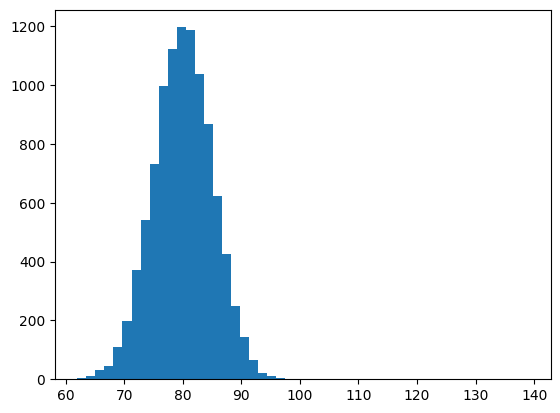

139.0
62.010955856603566


In [15]:
#### 5% noise

np.random.seed(5)

data_std_5 = np.random.normal(mean, std, 10000)

outlier_size = int(0.05 * len(data_std_5))

lower_bound = 0 # 최솟값
upper_bound = 200 #최대값

range = upper_bound - lower_bound

outliers = np.random.randint(lower_bound, upper_bound, size=outlier_size)

for outlier in outliers:
    data_5 = np.concatenate((data_std_5, np.array([outlier + np.random.randint(-30, 30)])))

print(data_5)

plt.hist(data_5, bins=50)
plt.show()

print(max(data_5));print(min(data_5))

[82.20613743 78.34564924 92.15385594 ... 81.48861194 80.30561392
 52.        ]


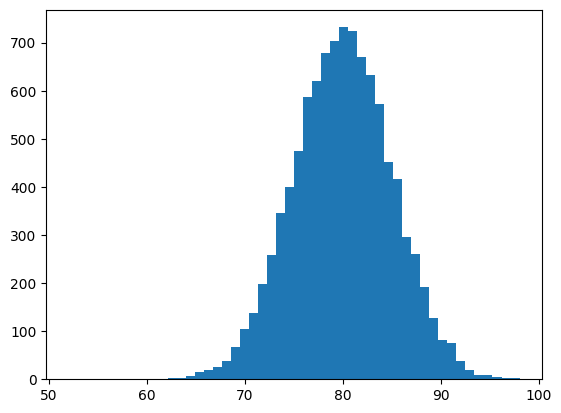

98.06159256098556
52.0


In [16]:
#### 10% noise

np.random.seed(5)

data = np.random.normal(mean, std, 10000)

outlier_size = int(0.1 * len(data))

lower_bound = data.min() - 30 # 최소 이상치 
upper_bound = data.max() + 30 # 최대 이상치

range = upper_bound - lower_bound

outliers = np.random.randint(lower_bound, upper_bound, size=outlier_size)
outliers = outliers[:, None]

for outlier in outliers:
    data_10 = np.concatenate((data, outlier))

print(data_10)

plt.hist(data_10, bins=50)
plt.show()

print(max(data_10));print(min(data_10))

#### 표준편차 10

44.02191171320713
116.12318512197112


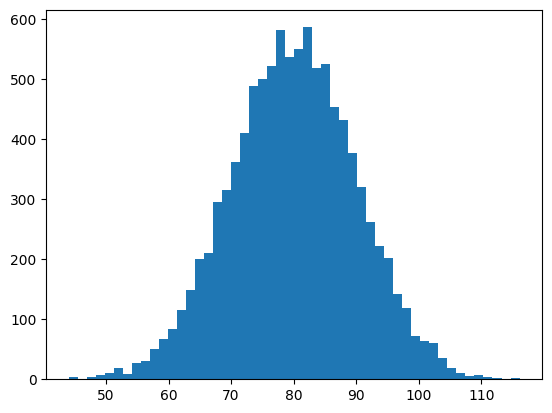

In [17]:
mean = 80
std = 10

# seed 설정해서 값 고정 
np.random.seed(5)

data_std_10 = np.random.normal(mean, std, 10000)

print(min(data_std_10));print(max(data_std_10))

plt.hist(data_std_10, bins=50)
plt.show()

#### 표준편차 15 

26.032867569810698
134.18477768295668


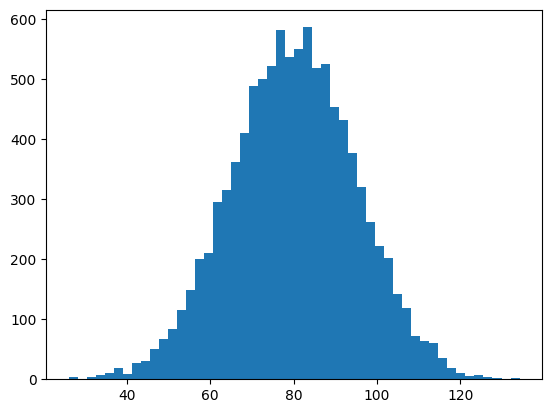

In [18]:
mean = 80
std = 15

# seed 설정해서 값 고정 
np.random.seed(5)

data_std_15 = np.random.normal(mean, std, 10000)

print(min(data_std_15));print(max(data_std_15))

plt.hist(data_std_15, bins=50)
plt.show()

#### 표준편차 20

8.043823426414264
152.24637024394224


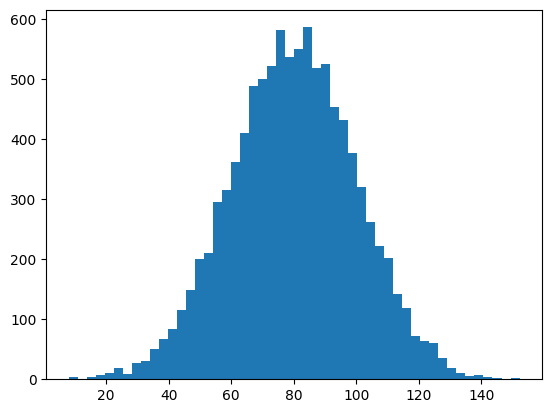

In [20]:
mean = 80
std = 20

# seed 설정해서 값 고정 
np.random.seed(5)

data_std_20 = np.random.normal(mean, std, 10000)

print(min(data_std_20));print(max(data_std_20))
plt.hist(data_std_20, bins=50)
plt.show()

#### ewma(ar)

In [22]:
import pandas as pd

data = pd.read_csv('../data/m_data.csv')
data.columns = ['update_time','heart_rate']
data.head(1)

,update_time,heart_rate
0,2021-04-16 10:00,88


In [23]:
def ewma(data, initial, gamma, k, outdata):
    
    # sort by update_time
    data = data.sort_values(by='update_time')
    
    # ewma 계산
    ewma = np.empty(len(data)) # data의 length만큼 데이터 생성
    ewma[0] = initial # 초기값 설정
    for i in range(1, len(data)):
        ewma[i] = gamma * data['heart_rate'].iloc[i] + (1-gamma)*ewma[i-1]
        
    # 신뢰구간 계산
    stdd = data['heart_rate'].std()
    
    lcl = ewma - k * np.sqrt(gamma / (2-gamma)) * stdd
    ucl = ewma + k * np.sqrt(gamma / (2-gamma)) * stdd
    
    # outlier labeling
    outlier_yn = np.where((ewma < lcl) | (ewma > ucl), 'Y', 'N')
    
    # 테이블로 만들기
    ewma_out = pd.DataFrame({'update_time': data['update_time'],
                             'ewma': ewma,
                             'lcl': lcl,
                             'ucl': ucl,
                             'outlier_yn': outlier_yn})
    
    return ewma_out

In [ ]:
outda = ewma(data, 80 , 0.25, 5, )